In [1]:
import pandas as  pd

In [2]:
d = {'State':["Alabama","Alaska","Arizina","Arkansas","California","Colorado","Connecticut","Delaware"],
     'Population':[4779736,170231,6392017,2915918,37253956,5029196,3574097,897934],
     'Murder.rate':[5.7,5.6,4.7,5.6,4.4,2.8,2.4,5.8],
     'Abbreviation':['AL','AK','AZ','AR','CA','CO','CT','DE']}

In [3]:
state = pd.DataFrame(d)

In [4]:
state

,State,Population,Murder.rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,170231,5.6,AK
2,Arizina,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [5]:
state.Population.mean()

7626635.625

In [6]:
state.Population.median()

4176916.5

## Robust Measures of Location

### Trimmed Mean

In [7]:
import numpy as np
from scipy import stats
stats.trim_mean(state.Population, 0.10)

7626635.625

### Weighted Mean

In [8]:
import numpy as np
np.average(state["Murder.rate"],weights= state.Population )

4.365529372920579

### Weighted Median

In [9]:
import wquantiles as wq
wq.median(state["Murder.rate"],weights= state.Population)

4.445038814921139

## Estimates of variablity

In [10]:
# Standard Deviation
state.Population.std()

12151668.028781855

In [11]:
# Interquartile Range
state.Population.quantile(0.75) - state.Population.quantile(0.25)

2958479.25

### Robust Measure of Dispersion

In [12]:
# Median Deviation about Median
from scipy import stats as st
st.median_abs_deviation(state['Population'])

1738049.5

## Visualization

### Exploring Data Distribution

In [13]:
# Percentile for Tail Summerization
state['Murder.rate'].quantile([0.05,0.25,0.50,0.75,0.95])

0.05    2.540
0.25    4.000
0.50    5.150
0.75    5.625
0.95    5.765
Name: Murder.rate, dtype: float64

In [14]:
state['Murder.rate'].describe()

count    8.000000
mean     4.625000
std      1.350926
min      2.400000
25%      4.000000
50%      5.150000
75%      5.625000
max      5.800000
Name: Murder.rate, dtype: float64

Text(0, 0.5, 'Population(millions)')

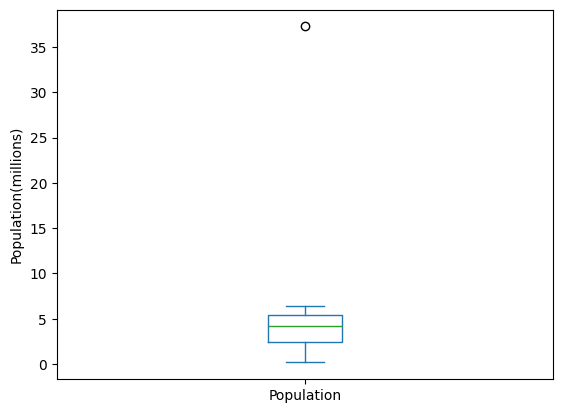

In [15]:
#Boxplot
ax = (state.Population/1_000_000).plot.box()
ax.set_ylabel('Population(millions)')

### See What Happens Next